# Feature evaluation for the move statistic

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [52]:
df = pd.read_csv("custom/CB_WR_data_with_move_separation_full.csv")
df.head()

,Unnamed: 0,gameId,playId,successOff,manCoverage,targetOff,nflIdDef,defPlayerName,defenseTeam,defPos,...,heightAdv,route,WR,TE,RB,CB,FS,WRToCBRatio,Separation,Move Separation
0,0,2018090600,75,True,False,True,2555383,Jalen Mills,PHI,CB,...,-3.0,HITCH,2,1,1,2,2,1.000000,0.760938,0.760938
1,1,2018090600,146,False,False,False,2552689,Ronald Darby,PHI,CB,...,1.0,HITCH,3,1,1,3,1,1.000000,0.000000,0.000000
2,2,2018090600,146,False,False,False,2557958,Sidney Jones,PHI,CB,...,2.0,CROSS,3,1,1,3,1,1.000000,0.000000,0.000000
3,3,2018090600,146,False,False,True,2555383,Jalen Mills,PHI,CB,...,-1.0,HITCH,3,1,1,3,1,1.000000,0.000000,0.000000
4,4,2018090600,168,False,False,False,2552689,Ronald Darby,PHI,CB,...,-3.0,SLANT,2,1,2,3,1,0.666667,0.000000,0.000000


In [53]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [54]:
np.allclose(df["Separation"],df["Move Separation"])

True

In [55]:
targeted_df = df[df["targetOff"] == True].copy()
targeted_df.head()

,gameId,playId,successOff,manCoverage,targetOff,nflIdDef,defPlayerName,defenseTeam,defPos,nflIdOff,...,heightAdv,route,WR,TE,RB,CB,FS,WRToCBRatio,Separation,Move Separation
0,2018090600,75,True,False,True,2555383,Jalen Mills,PHI,CB,2495454,...,-3.0,HITCH,2,1,1,2,2,1.0,0.760938,0.760938
3,2018090600,146,False,False,True,2555383,Jalen Mills,PHI,CB,2560854,...,-1.0,HITCH,3,1,1,3,1,1.0,0.000000,0.000000
6,2018090600,190,True,False,True,2552689,Ronald Darby,PHI,CB,2495454,...,-4.0,CORNER,3,1,1,3,2,1.0,0.000000,0.000000
7,2018090600,190,True,False,True,2557958,Sidney Jones,PHI,CB,2495454,...,-3.0,CORNER,3,1,1,3,2,1.0,0.000000,0.000000
10,2018090600,320,False,False,True,2539653,Robert Alford,ATL,CB,2552600,...,-2.0,OUT,3,1,1,3,1,1.0,-0.535315,-0.535315


In [59]:
# filter all those out with separation = 0
targeted_df = targeted_df[targeted_df["Separation"] != 0].copy()
# same for move separation 
targeted_df_2 = targeted_df[targeted_df["Move Separation"] != 0].copy()
len(targeted_df)
len(targeted_df_2)

146

In [60]:
sep_created = targeted_df["Separation"]
success_numeric = targeted_df["successOff"].astype(int)

In [61]:
sep_created

0       0.760938
10     -0.535315
14      0.117511
23     -0.448384
35     -1.230672
          ...   
2223   -0.729398
2231   -0.379369
2286   -2.155839
2318   -1.511086
2380    0.460992
Name: Separation, Length: 146, dtype: float64

In [41]:
len(sep_created)

146

Text(0.5, 1.0, 'Separation Created vs Play Success for Targeted WRs')

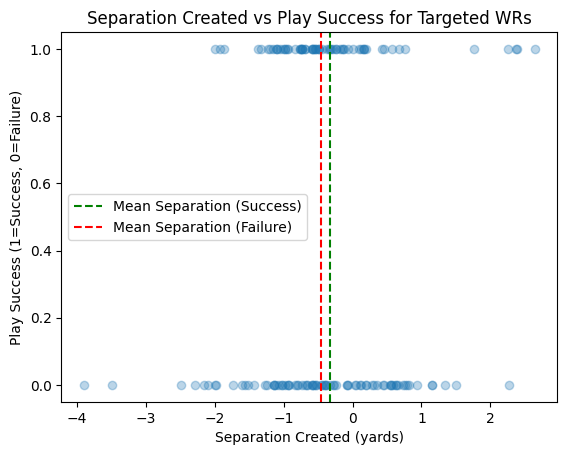

In [47]:
plt.scatter(sep_created, success_numeric, alpha=0.3)
plt.xlabel("Separation Created (yards)")
plt.ylabel("Play Success (1=Success, 0=Failure)")

# show the mean for both successes and failures
mean_sep_success = sep_created[success_numeric == 1].mean()
mean_sep_failure = sep_created[success_numeric == 0].mean()
plt.axvline(mean_sep_success, color='g', linestyle='--', label='Mean Separation (Success)')
plt.axvline(mean_sep_failure, color='r', linestyle='--', label='Mean Separation (Failure)')
plt.legend()
plt.title("Separation Created vs Play Success for Targeted WRs")

In [ ]:





# --- 5️⃣ Logistic regression: successOff ~ Separation ---
X = sm.add_constant(analysis_df["Separation"])
y = analysis_df["successOff"]
model = sm.Logit(y, X).fit(disp=False)
print("\nLogistic Regression Summary:")
print(model.summary())

# --- 6️⃣ Compute AUC (predictive power of separation alone) ---
auc = roc_auc_score(y, analysis_df["Separation"])
print(f"\nAUC (Separation predicting Catch Success): {auc:.3f}")

# --- 7️⃣ Visualization ---
sns.boxplot(x="successOff", y="Separation", data=analysis_df)
plt.xlabel("Catch Made (1 = Yes, 0 = No)")
plt.ylabel("Separation (yards)")
plt.title("Separation vs Catch Success")
plt.show()

# --- 8️⃣ Optional: probability curve ---
sep_range = np.linspace(analysis_df["Separation"].min(), analysis_df["Separation"].max(), 100)
pred_probs = model.predict(sm.add_constant(sep_range))

plt.plot(sep_range, pred_probs)
plt.xlabel("Separation (yards)")
plt.ylabel("Predicted Catch Probability")
plt.title("Catch Probability vs Separation")
plt.grid(True)
plt.show()



Separation by catch success:
Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []

Correlation between Separation and Catch Success: nan


ValueError: zero-size array to reduction operation maximum which has no identity